# WeatherPy

---

##  Generate Random Geographic Coordinates and a List of Cities

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city.replace(' ', '+')}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

   # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        # city_date = datetime.utcfromtimestamp(city_weather['dt']).isoformat('%Y-%m-%d %H:%M:%S')
        city_date = city_weather['dt']
     # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
         print(f"City not found. Skipping...\n{e}")
         pass
              
# # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | papatowai
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mejit
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | saint-francois
Processing Record 7 of Set 1 | invercargill
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | port mathurin
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | la passe
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | bandarbeyla
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | broome
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | priob'ye
Processing Record 21 of Set 1 | puerto san carlos
City not found. Skipping...
'coord'
P

In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# convert kelvin to celcius 
city_data_df["Max Temp (C)"] = city_data_df["Max Temp"] - 273.15

# Show Record Count
city_data_df.count()

City            579
Lat             579
Lng             579
Max Temp        579
Humidity        579
Cloudiness      579
Wind Speed      579
Country         579
Date            579
Max Temp (C)    579
dtype: int64

In [37]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
0,papatowai,-46.5619,169.4708,281.82,76,100,3.97,NZ,1717020064,8.67
1,blackmans bay,-43.0167,147.3167,285.22,63,100,4.07,AU,1717020065,12.07
2,ushuaia,-54.8000,-68.3000,276.96,81,75,8.23,AR,1717020066,3.81
3,mejit,10.2753,170.8646,300.70,81,99,6.04,MH,1717020066,27.55
4,adamstown,-25.0660,-130.1015,294.37,68,92,2.63,PN,1717020067,21.22
5,saint-francois,46.4154,3.9054,288.38,89,100,2.06,FR,1717020067,15.23
6,invercargill,-46.4000,168.3500,280.38,91,100,1.79,NZ,1717020068,7.23
7,port-aux-francais,-49.3500,70.2167,275.23,69,94,18.45,TF,1717020068,2.08
8,port mathurin,-19.6833,63.4167,298.10,82,78,8.24,MU,1717020069,24.95
9,iqaluit,63.7506,-68.5145,276.00,64,75,6.71,CA,1717020016,2.85


In [38]:
# Create the output file
output_data_file = "../WeatherPy/Weather_data.csv"
#C:\Users\samri\OneDrive\Desktop\BOOTCAMP\homework\06-python-api\python-api-challenge\WeatherPy
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [23]:
# Read saved data
city_data_df = pd.read_csv("../WeatherPy/Weather_data.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,281.82,76,100,3.97,NZ,1717020064
1,blackmans bay,-43.0167,147.3167,285.22,63,100,4.07,AU,1717020065
2,ushuaia,-54.8000,-68.3000,276.96,81,75,8.23,AR,1717020066
3,mejit,10.2753,170.8646,300.70,81,99,6.04,MH,1717020066
4,adamstown,-25.0660,-130.1015,294.37,68,92,2.63,PN,1717020067
5,saint-francois,46.4154,3.9054,288.38,89,100,2.06,FR,1717020067
6,invercargill,-46.4000,168.3500,280.38,91,100,1.79,NZ,1717020068
7,port-aux-francais,-49.3500,70.2167,275.23,69,94,18.45,TF,1717020068
8,port mathurin,-19.6833,63.4167,298.10,82,78,8.24,MU,1717020069


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

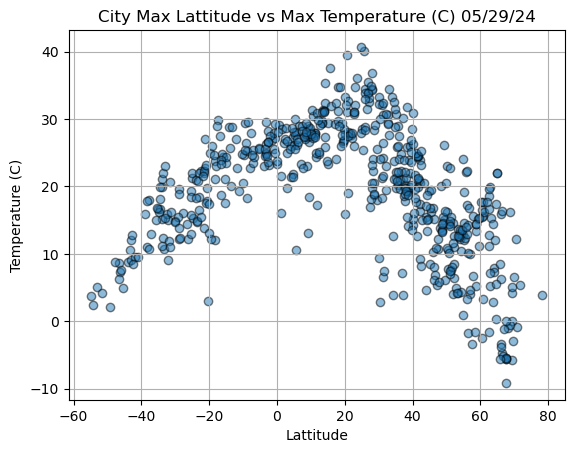

In [59]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Max Temp (C)'],
    edgecolor = 'black',
    linewidth=1,
    marker="o",
    alpha=0.5,
    label ="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Lattitude vs Max Temperature (C) "+ time.strftime("%x"))
plt.xlabel("Lattitude")
plt.ylabel("Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

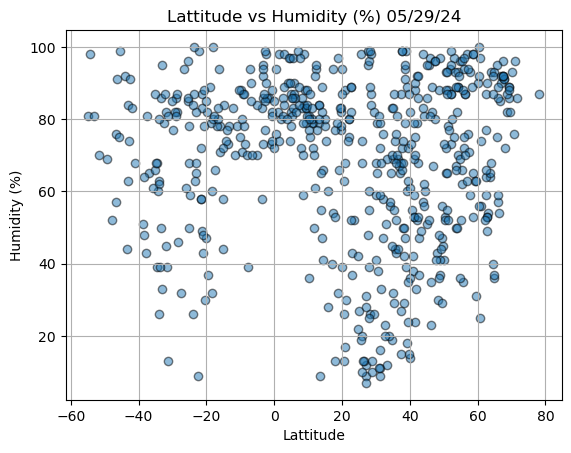

In [60]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Humidity'],
    edgecolor = 'black',
    linewidth=1,
    marker="o",
    alpha=0.5,
    label ="Cities"
)

# Incorporate the other graph properties
plt.title("Lattitude vs Humidity (%) " + time.strftime("%x"))
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("../WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

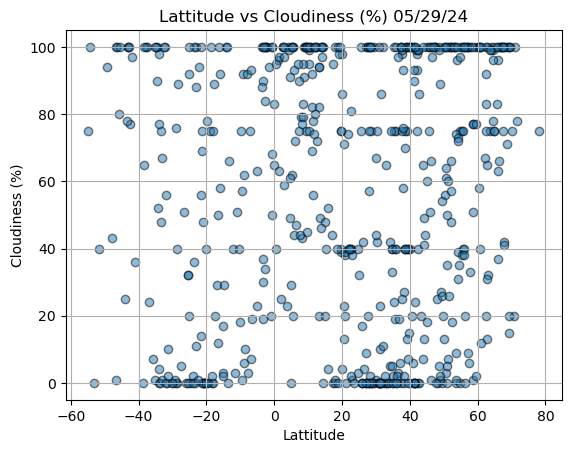

In [61]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(
    city_data_df['Lat'],
    city_data_df['Cloudiness'],
    edgecolor = 'black',
    linewidth=1,
    marker="o",
    alpha=0.5,
    label ="Cities"
)

# Incorporate the other graph properties
plt.title("Lattitude vs Cloudiness (%) "+ time.strftime("%x"))
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("../WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

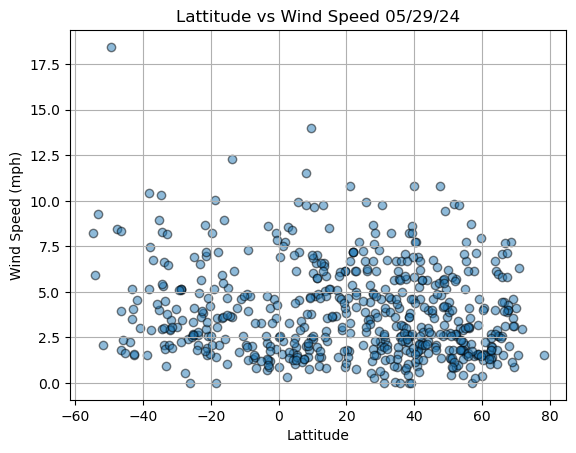

In [62]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(
    city_data_df['Lat'],
    city_data_df['Wind Speed'],
    edgecolor = 'black',
    linewidth=1,
    marker="o",
    alpha=0.5,
    label ="Cities"
)

# Incorporate the other graph properties
plt.title("Lattitude vs Wind Speed "+ time.strftime("%x"))
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [135]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_label, y_label, title):
    slope, intercept, r_value, p_value, stderr = linregress(x_values, y_values)
    # calculate regression line
    regress_values =x_values * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept,2)}"

    plt.scatter(x_values, y_values, edgecolor = "black", s=100)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(min(x_values), min(y_values)), fontsize=12, color="red")
    print(f"The r-sqaured is: {r_value**2}")
    plt.grid(True)
    plt.show()
    


In [136]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0].copy()


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
3,mejit,10.2753,170.8646,300.70,81,99,6.04,MH,1717020066,27.55
5,saint-francois,46.4154,3.9054,288.38,89,100,2.06,FR,1717020067,15.23
9,iqaluit,63.7506,-68.5145,276.00,64,75,6.71,CA,1717020016,2.85
10,la passe,45.5549,-0.8967,289.28,95,100,6.74,FR,1717020070,16.13
13,kodiak,57.7900,-152.4072,279.88,93,100,6.17,US,1717020072,6.73


In [137]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <0].copy()

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
0,papatowai,-46.5619,169.4708,281.82,76,100,3.97,NZ,1717020064,8.67
1,blackmans bay,-43.0167,147.3167,285.22,63,100,4.07,AU,1717020065,12.07
2,ushuaia,-54.8000,-68.3000,276.96,81,75,8.23,AR,1717020066,3.81
4,adamstown,-25.0660,-130.1015,294.37,68,92,2.63,PN,1717020067,21.22
6,invercargill,-46.4000,168.3500,280.38,91,100,1.79,NZ,1717020068,7.23


###  Temperature vs. Latitude Linear Regression Plot

The r-sqaured is: 0.5344672426226217


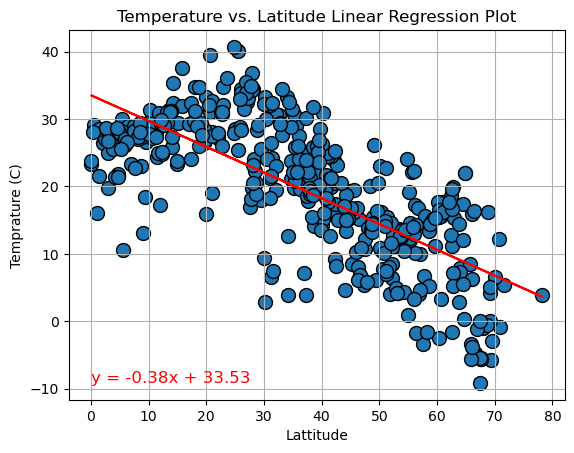

In [138]:
# Linear regression on Northern Hemisphere
x_value_north = northern_hemi_df["Lat"]
y_value_north = northern_hemi_df["Max Temp (C)"]
# def linear_regression(x_values, y_values, x_label, y_label, title)
linear_regression(x_value_north, y_value_north, "Lattitude", "Temprature (C)", "Temperature vs. Latitude Linear Regression Plot")

The r-sqaured is: 0.6976064634681778


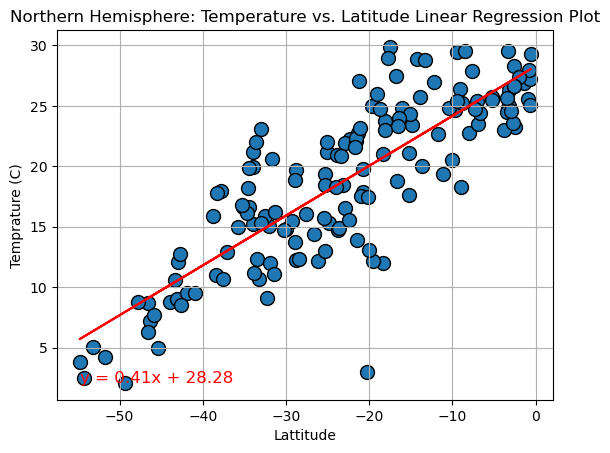

In [139]:
# Linear regression on Southern Hemisphere
x_value_south = southern_hemi_df["Lat"]
y_value_south = southern_hemi_df["Max Temp (C)"]
# def linear_regression(x_values, y_values, x_label, y_label, title)
linear_regression(x_value_south, y_value_south, "Lattitude", "Temprature (C)", "Northern Hemisphere: Temperature vs. Latitude Linear Regression Plot")

**Discussion about the linear relationship:** The Northern Hemisphere, the higher the lattitude, the lower the temperature. However, in the southern hemisphere, it is the opposite where the closer you are to the equator, the higher the temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-sqaured is: 0.0005042225827971255


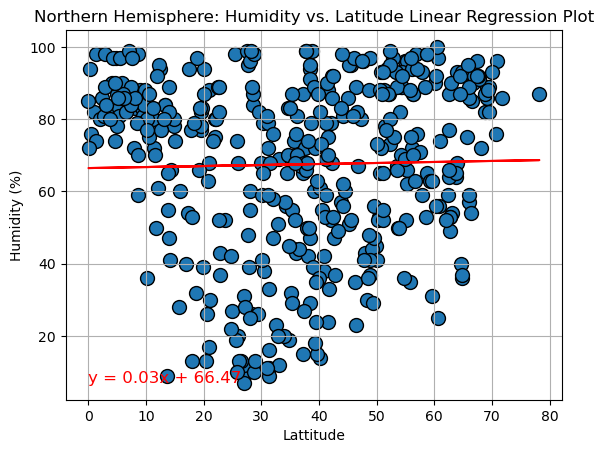

In [140]:
# Northern Hemisphere
x_value_north = northern_hemi_df["Lat"]
y_value_north = northern_hemi_df["Humidity"]
# def linear_regression(x_values, y_values, x_label, y_label, title)
linear_regression(x_value_north, y_value_north, "Lattitude", "Humidity (%)", "Northern Hemisphere: Humidity vs. Latitude Linear Regression Plot")

The r-sqaured is: 0.042306779397471087


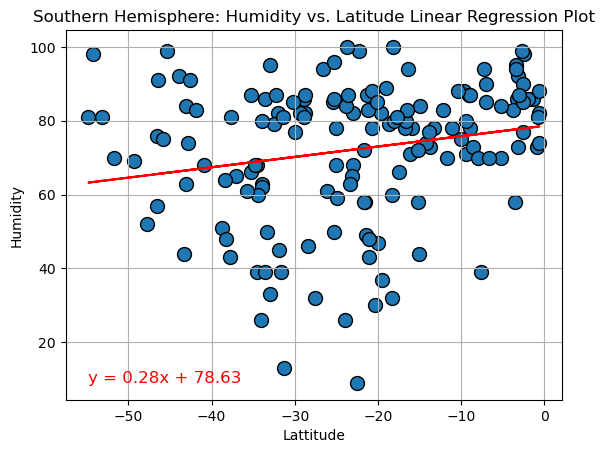

In [146]:
# Southern Hemisphere
x_value_south = southern_hemi_df["Lat"]
y_value_south = southern_hemi_df["Humidity"]
# def linear_regression(x_values, y_values, x_label, y_label, title)
linear_regression(x_value_south, y_value_south, "Lattitude", "Humidity", "Southern Hemisphere: Humidity vs. Latitude Linear Regression Plot")

**Discussion about the linear relationship:** There is no linear relationship between the temperature and the humidity in both the northern and sourthern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-sqaured is: 0.0005571497711985636


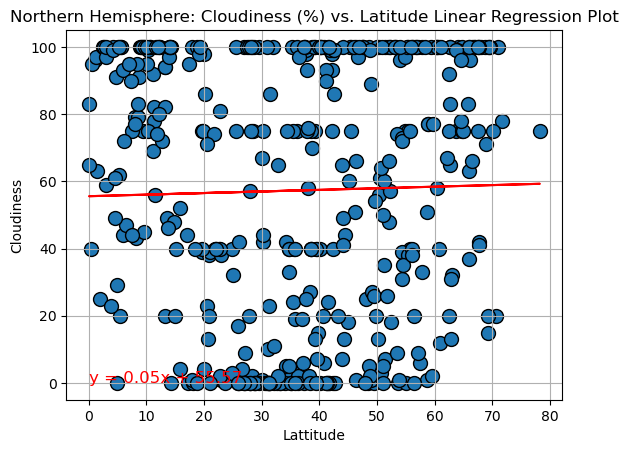

In [148]:
# Northern Hemisphere
x_value_north = northern_hemi_df["Lat"]
y_value_north = northern_hemi_df["Cloudiness"]
# def linear_regression(x_values, y_values, x_label, y_label, title)
linear_regression(x_value_north, y_value_north, "Lattitude", "Cloudiness", "Northern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression Plot")

The r-sqaured is: 6.902818189122626e-05


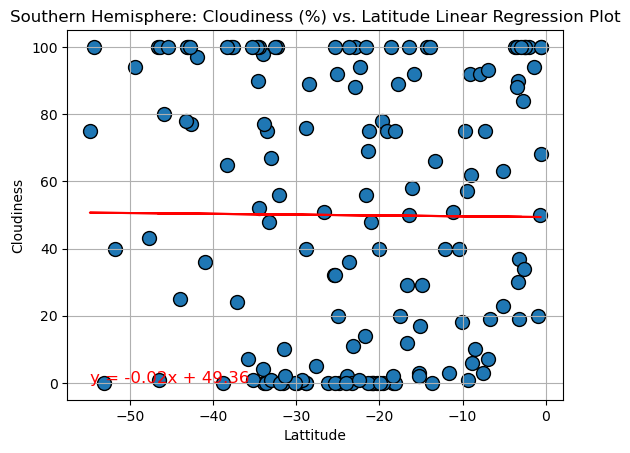

In [147]:
# Southern Hemisphere
x_value_south = southern_hemi_df["Lat"]
y_value_south = southern_hemi_df["Cloudiness"]
# def linear_regression(x_values, y_values, x_label, y_label, title)
linear_regression(x_value_south, y_value_south, "Lattitude", "Cloudiness", "Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression Plot")

**Discussion about the linear relationship:** There is no significant linear relationship between cloudiness and lattitude in both the nothern hemisphere and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-sqaured is: 0.01863897353466178


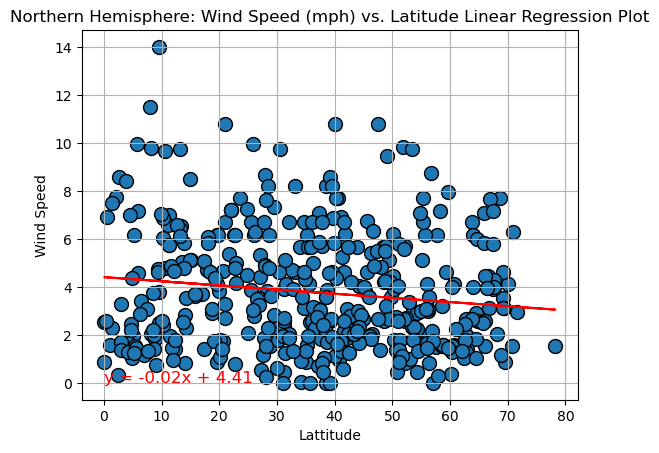

In [144]:
# Northern Hemisphere
_value_north = northern_hemi_df["Lat"]
y_value_north = northern_hemi_df["Wind Speed"]
# def linear_regression(x_values, y_values, x_label, y_label, title)
linear_regression(x_value_north, y_value_north, "Lattitude", "Wind Speed", "Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression Plot")

The r-sqaured is: 0.05752175397778391


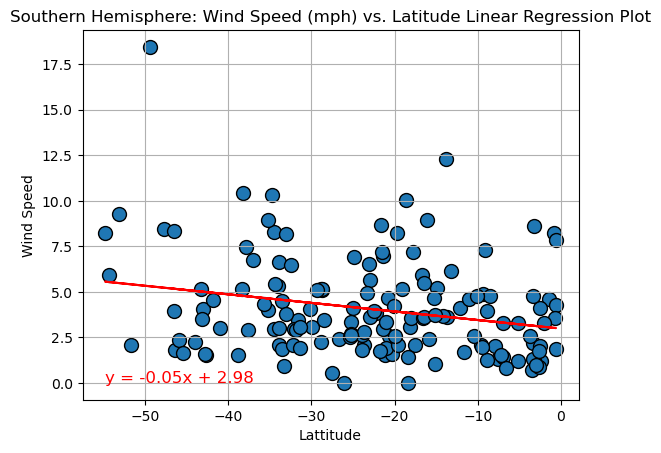

In [149]:
# Southern Hemisphere
x_value_south = southern_hemi_df["Lat"]
y_value_south = southern_hemi_df["Wind Speed"]
# def linear_regression(x_values, y_values, x_label, y_label, title)
linear_regression(x_value_south, y_value_south, "Lattitude", "Wind Speed", "Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression Plot")

**Discussion about the linear relationship:** there is no significant linear relationship between wind speed and lattitude in both the nothern hemisphere and southern hemisphere.